# First Assignment - Classification

## Preliminary exploration and analysis

In [31]:
#Read the data
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("model.csv")

In [4]:
data.sample(5)

,id,Gender,Age,Driving_License,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Seniority,Target
67410,67411,Female,38,1,M,41,No,1-2 Year,Yes,38634,26,191,1
5492,5493,Male,50,1,D,7,No,1-2 Year,Yes,45371,25,14,1
49488,49489,Female,47,1,D,28,No,1-2 Year,Yes,45865,124,295,1
93596,93597,Male,49,1,C,28,No,1-2 Year,Yes,34213,26,146,1
7634,7635,Female,36,1,C,39,No,1-2 Year,Yes,2630,157,54,1


In [5]:
# Check the dimension of the dataset
print(data.shape)

(102351, 13)


In [6]:
# Check the list of the columns
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Licence_Type', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Seniority', 'Target'],
      dtype='object')

In [7]:
data.dtypes

id                       int64
Gender                  object
Age                      int64
Driving_License          int64
Licence_Type            object
Region_Code              int64
Previously_Insured      object
Vehicle_Age             object
Vehicle_Damage          object
Annual_Premium           int64
Policy_Sales_Channel     int64
Seniority                int64
Target                   int64
dtype: object

In [8]:
data.describe()

,id,Age,Driving_License,Region_Code,Annual_Premium,Policy_Sales_Channel,Seniority,Target
count,102351.000000,102351.000000,102351.000000,102351.000000,102351.000000,102351.000000,102351.000000,102351.000000
mean,51176.000000,39.867339,0.950259,26.519936,30748.636398,107.407900,154.527030,0.317271
std,29546.333038,14.935793,0.217410,12.904874,17544.726810,55.327295,83.735221,0.465416
min,1.000000,20.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25588.500000,25.000000,1.000000,15.000000,24435.500000,26.000000,82.000000,0.000000
50%,51176.000000,39.000000,1.000000,28.000000,31943.000000,124.000000,155.000000,0.000000
75%,76763.500000,50.000000,1.000000,35.000000,39774.000000,152.000000,227.000000,1.000000
max,102351.000000,85.000000,1.000000,52.000000,540165.000000,163.000000,299.000000,1.000000


### Duplicated Data

In [9]:
# No duplicates!
data.duplicated().sum()

0

There are no duplicated data

### Missing values

In [10]:
# check which column has missing values
data.isna().any()

id                      False
Gender                  False
Age                     False
Driving_License         False
Licence_Type             True
Region_Code             False
Previously_Insured      False
Vehicle_Age             False
Vehicle_Damage          False
Annual_Premium          False
Policy_Sales_Channel    False
Seniority               False
Target                  False
dtype: bool

In [11]:
# Count number of missing values
data.isna().sum()

id                         0
Gender                     0
Age                        0
Driving_License            0
Licence_Type            5091
Region_Code                0
Previously_Insured         0
Vehicle_Age                0
Vehicle_Damage             0
Annual_Premium             0
Policy_Sales_Channel       0
Seniority                  0
Target                     0
dtype: int64

In [12]:
null = data[data.isnull().any(axis=1)]

In [13]:
#Check if all the null values are people with no licence and vice-versa
print("Null values are: {} and the values of Driving_License: {}".format(len(null), null['Driving_License'].unique().tolist()))
print("The number of no driving license records is: {} and the values of Licence_Type: {}".format(len(data[data['Driving_License']==0]), data[data['Driving_License']==0]['Licence_Type'].unique().tolist()))

Null values are: 5091 and the values of Driving_License: [0]
The number of no driving license records is: 5091 and the values of Licence_Type: [nan]


In [14]:
data = data.fillna('NO_LICENSE')

In [15]:
data['Licence_Type'].isnull().sum()

0

Missing values in "License_Type" have been replaced with a new categorical value

### Outlier detection

<AxesSubplot:>

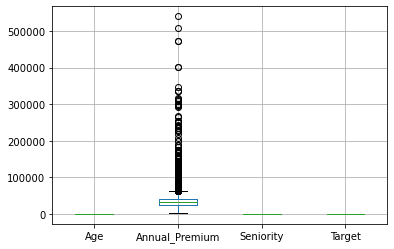

In [16]:
data = data.astype({'Region_Code': 'object', 'Policy_Sales_Channel': 'object', 'Driving_License' : 'object', 'id' :'string'})
data.select_dtypes(include=['int64']).boxplot()

Annual Premium seems to be the feature with the most extreme values

<AxesSubplot:>

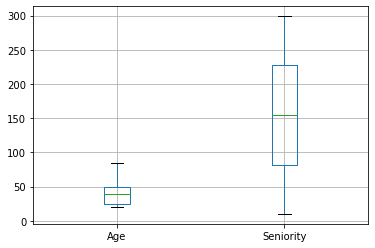

In [17]:
data.select_dtypes(include=['int64']).drop(columns=["Annual_Premium", 'Target']).boxplot()

Age and Seniority have a reasonable distribution

In [18]:
print("Min Annual Premium: {}, Max Annual Premium: {}, Count: {}".format(data['Annual_Premium'].min(), data['Annual_Premium'].max(), data['Annual_Premium'].count()))

Min Annual Premium: 2630, Max Annual Premium: 540165, Count: 102351


<AxesSubplot:xlabel='Annual_Premium'>

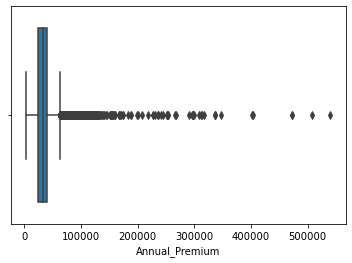

In [19]:
import seaborn as sns

sns.boxplot(x=data['Annual_Premium'])

array([[<AxesSubplot:title={'center':'Annual_Premium'}>]], dtype=object)

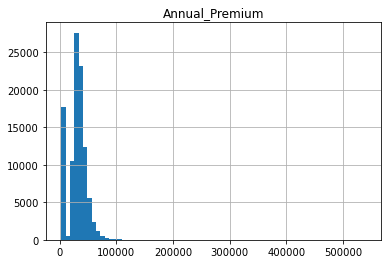

In [20]:
data.hist(column="Annual_Premium", bins=70)

<AxesSubplot:>

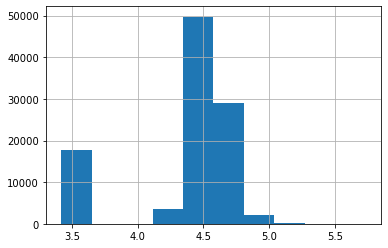

In [21]:
np.log10(data["Annual_Premium"]).hist()

<AxesSubplot:xlabel='Log_Annual_Premium'>

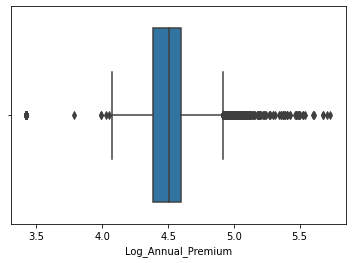

In [22]:
data["Log_Annual_Premium"] = np.log10(data["Annual_Premium"])
sns.boxplot(x=data["Log_Annual_Premium"])

#### Drop using Isolation Forest

In [23]:
from sklearn.ensemble import IsolationForest

a=np.array(data['Log_Annual_Premium'].tolist()).reshape(-1,1) 

rs=np.random.RandomState(0)
clf = IsolationForest(max_samples=100,random_state=rs, contamination=.0010) 
clf.fit(a)
if_scores = clf.decision_function(a)
if_anomalies=clf.predict(a)
if_anomalies=pd.Series(if_anomalies).replace([-1,1],[1,0])
if_anomalies=data[if_anomalies==1];

data_new_ol2 = data.drop(if_anomalies.index)

print("Min Annual Premium: {}, Max Annual Premium: {}, Count Outliers: {}".format(data_new_ol2['Annual_Premium'].min(), data_new_ol2['Annual_Premium'].max(), data['Annual_Premium'].count() - data_new_ol2['Annual_Premium'].count()))

Min Annual Premium: 2630, Max Annual Premium: 133747, Count Outliers: 70


In [24]:
data_no_outliers = data_new_ol2

## Categorical Features

### Categorical features exploration (cardinality, relative frequency)

In [25]:
data_no_outliers = data_no_outliers.astype({'Region_Code': 'object', 'Policy_Sales_Channel': 'object', 'Driving_License' : 'object', 'id' :'string'})
data_cat = data_no_outliers.select_dtypes(include=['object'])

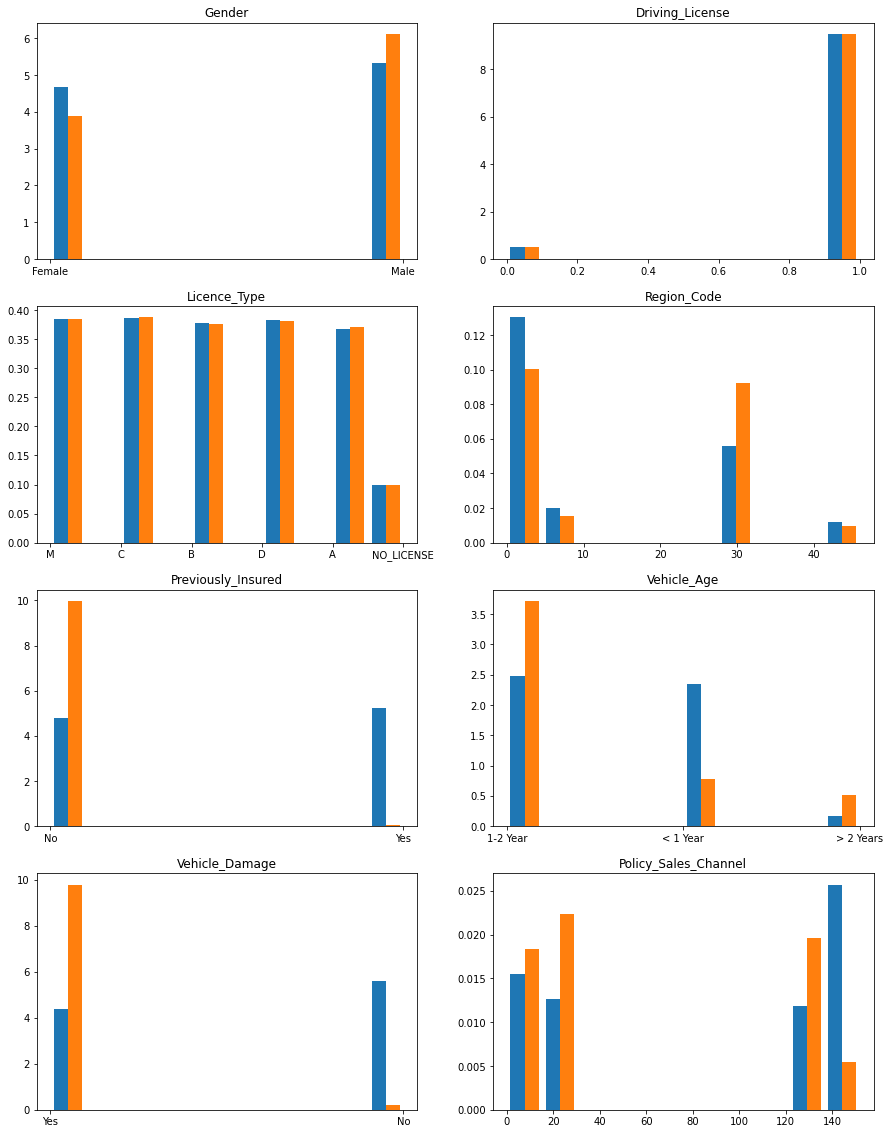

In [32]:
df_0=data_cat[data_no_outliers['Target']==0] # records wih target==0
df_1=data_cat[data_no_outliers['Target']==1] # records wih target==1

fig, axes = plt.subplots(4, 2,figsize=[15,20])
axes = axes.flatten()
i=0
for x in data_cat.columns:
    plt.sca(axes[i]) # set the current Axes
    plt.hist([df_0[x],df_1[x]],density=True)
    plt.title(x)
    i+=1
plt.show()

#### 1. Policy Sales Channel

In [33]:
#Count the number of records for each value
agg_policy = data_cat['Policy_Sales_Channel'].value_counts()
#Compute the relative frequency
agg_policy = agg_policy/agg_policy.sum()*100
#How many distinct values we have?
print(agg_policy.count())
print(agg_policy.head(5))
#Top 10 values are 92% of dataset
agg_policy.iloc[:5].sum()

4
152    29.294786
0      24.967492
26     23.930153
124    21.807569
Name: Policy_Sales_Channel, dtype: float64


100.0

#### 2. Region_Code

In [34]:
#Count the number of records for each value
agg_region = data_cat['Region_Code'].value_counts()

#Compute the relative frequency
agg_region = agg_region/agg_region.sum()*100

#How many distinct values we have?
print(agg_region.count())

print(agg_region.head(5))

#Top 10 values are 92% of dataset
print(agg_region.iloc[:5].sum())

4
0     55.521553
28    31.005759
8      8.407231
46     5.065457
Name: Region_Code, dtype: float64
100.0


#### 3. Licence_Type

In [35]:
#Count the number of records for each value
agg = data_cat['Licence_Type'].value_counts()

#Compute the relative frequency
agg = agg/agg.sum()*100

#How many distinct values we have?
print(agg.count())

print(agg.head(6))

#Top 10 values are 92% of dataset
print(agg.iloc[:1].sum())

6
C             19.379943
M             19.232311
D             19.118898
B             18.857852
A             18.435487
NO_LICENSE     4.975509
Name: Licence_Type, dtype: float64
19.379943489015556


### { Replace values with low-represented categories }

In [36]:
agg_policy = data_cat['Policy_Sales_Channel'].value_counts()
policy_sales_channel_to_drop = agg_policy[agg_policy < 0.05*data_cat['Policy_Sales_Channel'].count()].index.to_list()
print("Dropped {} sales channel".format(len(policy_sales_channel_to_drop)))
data_cat = data_cat.replace({'Policy_Sales_Channel' : policy_sales_channel_to_drop}, 0)

Dropped 0 sales channel


Replace all the Policy Sales Channel with a relative frequence < 5% with '0'

In [37]:
agg_region = data_cat['Region_Code'].value_counts()
region_code_to_drop = agg_region[agg_region < 0.05*data_cat['Region_Code'].count()].index.to_list()
print("Dropped {} sales channel".format(len(region_code_to_drop)))
data_cat = data_cat.replace({'Region_Code' : region_code_to_drop}, 0)

Dropped 0 sales channel


Replace all the Region Code with a relative frequence < 5% with '0'

In [38]:
data_cat['Policy_Sales_Channel'].value_counts()

152    29963
0      25537
26     24476
124    22305
Name: Policy_Sales_Channel, dtype: int64

In [39]:
data_cat['Region_Code'].value_counts()

0     56788
28    31713
8      8599
46     5181
Name: Region_Code, dtype: int64

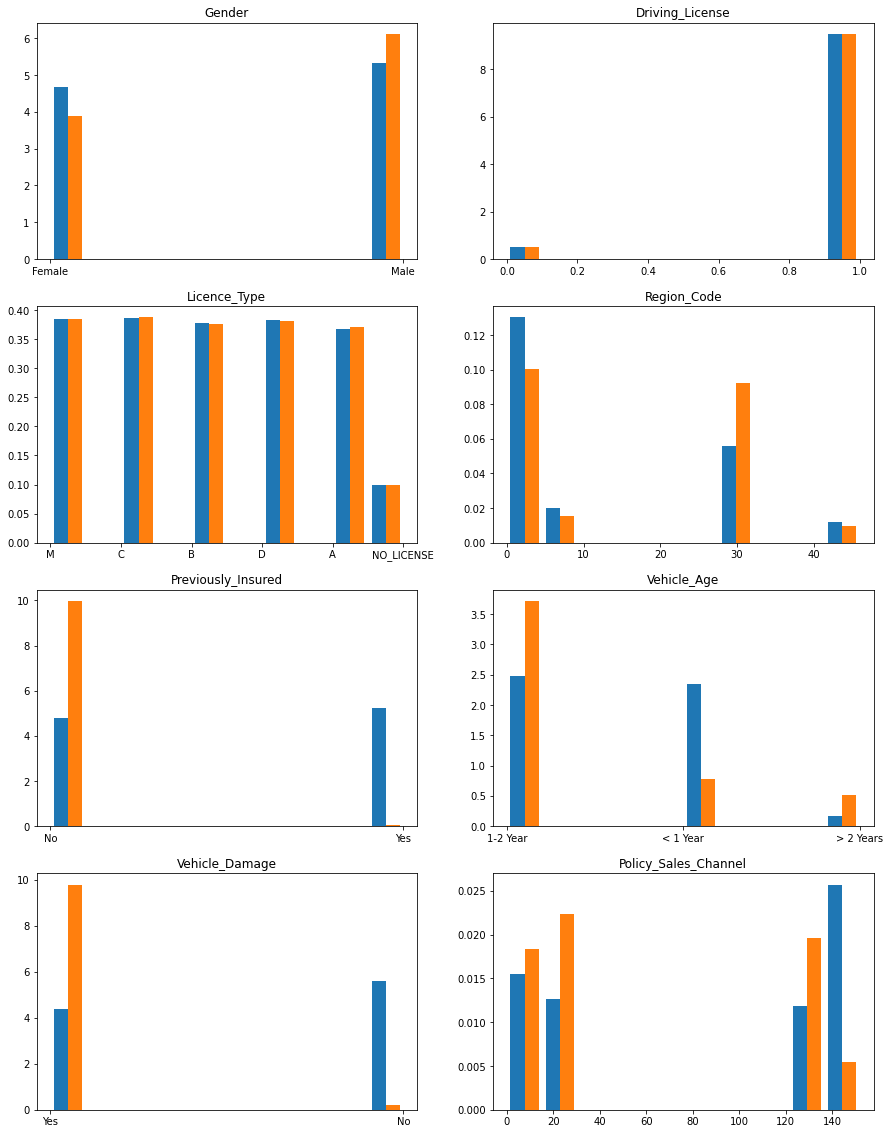

In [40]:
df_0=data_cat[data_no_outliers['Target']==0] # records wih target==0
df_1=data_cat[data_no_outliers['Target']==1] # records wih target==1

fig, axes = plt.subplots(4, 2,figsize=[15,20])
axes = axes.flatten()
i=0
for x in data_cat.columns:
    plt.sca(axes[i]) # set the current Axes
    plt.hist([df_0[x],df_1[x]],density=True)
    plt.title(x)
    i+=1
plt.show()

### Categorical variables conversion

#### 1. One-Hot-Coding, drop low-variance features

In [41]:
low_cardinality_features = ['Gender','Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Region_Code', 'Policy_Sales_Channel']
low_cardinality_dummy = pd.get_dummies(data_cat, columns=low_cardinality_features,drop_first=True, prefix=low_cardinality_features)   
low_cardinality_dummy.dtypes

Driving_License             object
Licence_Type                object
Gender_Male                  uint8
Previously_Insured_Yes       uint8
Vehicle_Age_< 1 Year         uint8
Vehicle_Age_> 2 Years        uint8
Vehicle_Damage_Yes           uint8
Region_Code_8                uint8
Region_Code_28               uint8
Region_Code_46               uint8
Policy_Sales_Channel_26      uint8
Policy_Sales_Channel_124     uint8
Policy_Sales_Channel_152     uint8
dtype: object

In [42]:
one_hot_dummies = low_cardinality_dummy.select_dtypes(include=['uint8'])

In [43]:
one_hot_dummies.sample(5)

,Gender_Male,Previously_Insured_Yes,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Region_Code_8,Region_Code_28,Region_Code_46,Policy_Sales_Channel_26,Policy_Sales_Channel_124,Policy_Sales_Channel_152
19409,1,0,1,0,1,0,0,0,0,0,1
52971,0,0,1,0,1,0,0,0,0,0,1
56340,0,1,1,0,0,0,0,0,0,0,1
58108,1,1,0,0,0,0,0,0,0,0,1
28791,0,0,0,0,1,0,0,0,0,1,0


## Numerical Features

#### 1. Extract numerical features

In [44]:
data_no_outliers.shape

(102281, 14)

In [45]:
data_num = data_no_outliers.select_dtypes(include=['int64', 'float64'])


In [46]:
data_num.sample(5)

,Age,Annual_Premium,Seniority,Target,Log_Annual_Premium
90464,44,22575,28,0,4.353628
57272,21,33592,292,0,4.526236
87190,23,34826,204,0,4.541904
43772,23,21494,194,0,4.332317
56113,63,2630,125,1,3.419956


#### 2. Examine distributions

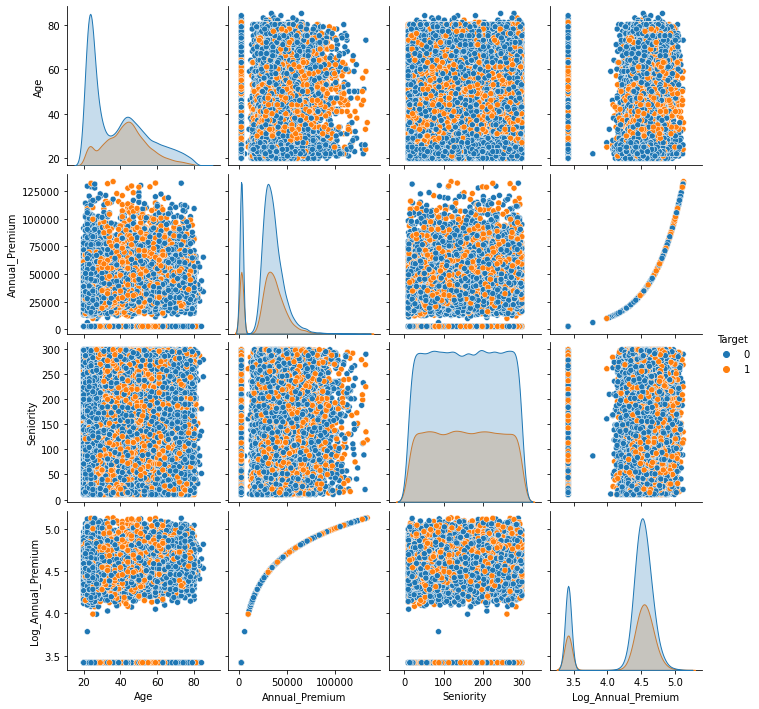

In [47]:
sns.pairplot(data_num, hue='Target')

In [48]:
data_num = data_num.drop(columns=['Target', 'Annual_Premium', 'Seniority'])

#### 3.a Standard Scaling

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [50]:
data_num[['Age', 'Log_Annual_Premium']] = scaler.fit_transform(data_num[['Age', 'Log_Annual_Premium']])

In [51]:
data_num.sample(5)

,Age,Log_Annual_Premium
91800,-1.129208,0.111722
40237,0.678598,0.394377
85983,-0.861385,-0.091247
66747,-0.995296,-2.108074
85448,-0.593562,0.283150


<AxesSubplot:>

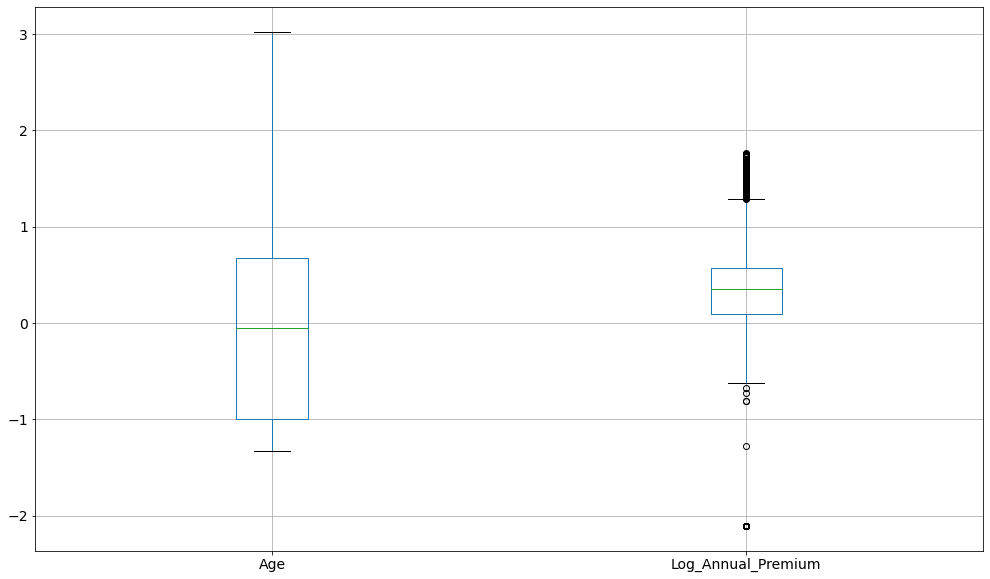

In [52]:
data_num.boxplot(figsize=(17, 10), fontsize=14)

## Join numerical features with transformed categorical features

Join: Numerical scaled features (data_num) + One Hot Encoded Categorical Variables (one_hot_dummies) + Target

In [53]:
final_dataset = pd.concat([data_num,one_hot_dummies,data_no_outliers["Target"]], axis = 1)

In [54]:
final_dataset.columns

Index(['Age', 'Log_Annual_Premium', 'Gender_Male', 'Previously_Insured_Yes',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years', 'Vehicle_Damage_Yes',
       'Region_Code_8', 'Region_Code_28', 'Region_Code_46',
       'Policy_Sales_Channel_26', 'Policy_Sales_Channel_124',
       'Policy_Sales_Channel_152', 'Target'],
      dtype='object')

In [55]:
final_dataset.dtypes

Age                         float64
Log_Annual_Premium          float64
Gender_Male                   uint8
Previously_Insured_Yes        uint8
Vehicle_Age_< 1 Year          uint8
Vehicle_Age_> 2 Years         uint8
Vehicle_Damage_Yes            uint8
Region_Code_8                 uint8
Region_Code_28                uint8
Region_Code_46                uint8
Policy_Sales_Channel_26       uint8
Policy_Sales_Channel_124      uint8
Policy_Sales_Channel_152      uint8
Target                        int64
dtype: object

In [56]:
final_dataset.sample(20)

,Age,Log_Annual_Premium,Gender_Male,Previously_Insured_Yes,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Region_Code_8,Region_Code_28,Region_Code_46,Policy_Sales_Channel_26,Policy_Sales_Channel_124,Policy_Sales_Channel_152,Target
62203,2.084670,1.084269,1,0,0,0,1,0,1,0,1,0,0,0
29531,-0.392694,-0.312041,1,0,0,0,1,0,0,0,0,0,0,1
19219,-0.057915,0.482574,1,1,0,0,0,0,0,0,0,0,1,0
27076,-0.325739,0.347179,1,1,0,0,0,0,1,0,0,0,1,0
33458,-1.062252,0.259241,0,0,1,0,0,0,0,0,0,0,1,0
93300,0.142952,0.707563,1,0,0,1,1,0,1,0,0,0,0,1
83634,1.682935,0.577655,0,1,0,0,0,0,0,0,0,1,0,0
94,0.544687,0.836213,0,0,0,0,1,0,1,0,0,0,0,1
57149,-1.129208,0.180187,1,1,1,0,0,0,0,0,0,0,1,0
97945,2.620316,0.333876,1,0,0,0,0,1,0,0,1,0,0,0


In [59]:
final_dataset.shape

(102281, 14)

## Classification - Random forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import imblearn 
from imblearn.over_sampling import SMOTE

In [60]:
#Separate features and target
X = final_dataset.iloc[:,1:-1]
y = final_dataset.iloc[:,-1]

#SPLIT DATA
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30,
                                                    stratify=y,
                                                    random_state= 123)

print(X_train.shape, X_test.shape) #shape before smote
sm = SMOTE(random_state = 101)
X_train, y_train = sm.fit_resample(X_train, y_train)
print(X_train.shape, X_test.shape) #shape after smote

(71596, 12) (30685, 12)
(97770, 12) (30685, 12)


In [61]:
## Use a grid search to find optimal parameters for the Random Forest
parameters = {'n_estimators' : [490, 500, 510],
    'max_depth' :  [10, 15, 20],
    'min_samples_split' :[2,4,6],
     'min_samples_leaf' :[1,2,4],     
    'criterion':['entropy']}

rand_forest = RandomForestClassifier()
gs = GridSearchCV(rand_forest, parameters, cv=3, scoring = 'f1', verbose=2, n_jobs=5, refit=True)
gs.fit(X_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=5,
             param_grid={'criterion': ['entropy'], 'max_depth': [15],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [490]},
             scoring='f1', verbose=2)

In [62]:
#summarize the results of GRIDSEARCH
print('**GRIDSEARCH RESULTS**')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

**GRIDSEARCH RESULTS**
Best score: 0.816245 using {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 490}
0.816245 (0.002603) with: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 490}


              precision    recall  f1-score   support

           0       0.94      0.66      0.77     20951
           1       0.55      0.91      0.69      9734

    accuracy                           0.74     30685
   macro avg       0.75      0.78      0.73     30685
weighted avg       0.82      0.74      0.75     30685



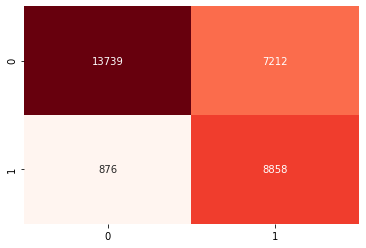

In [63]:
#TEST SET
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);

print(classification_report(y_test, y_pred))

In [68]:
print("f1_score test: ", f1_score(y_test, y_pred))

preds_train = best_model.predict(X_train)
print("f1_score train (with smote): ", f1_score(y_train, preds_train))

f1_score test:  0.686560223221206
f1_score train (with smote):  0.836753412585652
